<center>

<image src="https://www.upm.es/sfs/Rectorado/Gabinete%20del%20Rector/Logos/UPM/Logotipo/LOGOTIPO%20color%20PNG.png" alt="UPM Logo" height=150>


<h1 style="text-align: center;">  </h1>

# Trabajo de Fin de Grado

## Carlota Medrano

### Supervised by Giannicola Scarpa

</center>


## 1. Index <a name="index"></a>

1. [Index](#index)
2. [Install packages](#install1)
3. [Install libraries](#install2)
4. [Main code](#main)
5. [Example](#example)

## 2. Install Packages <a name="install"></a>

In [21]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install tensorflow
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.8/208.8 MB 15.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 kB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 30.6 MB/s eta 0:00:00a 0:00:01


## 3. Install Libraries <a name="install2"></a>

In [39]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

## 4. Main Code <a name="main"></a>

In [44]:
def allais_data(n):
    
    # Initialize the list to hold all lists
    data = []
    
    for _ in range(n):
        # Generate random values for valuea and valueb
        valuea = round(np.random.uniform(0, 0.99), 2)
        if valuea < 0.89:
            valuea = 1
        elif valuea == 0.89:
            valuea = 0
        else:
            valuea = 5
        valueb = round(np.random.uniform(0, 0.99), 2)
        if valueb < 0.89:
            valueb = 0
        else:
            valueb = 1
        valuec = round(np.random.uniform(0, 0.99), 2)
        if valuec < 0.90:
            valuec = 0
        else:
            valuec = 5
        
        # Create the 4 lists
        data.append([1, 0, 0, 0, 1])
        data.append([0, 1, 0, 0, valuea])
        data.append([0, 0, 1, 0, valueb])
        data.append([0, 0, 0, 1, valuec])
    
    # Convert the list of lists into a pandas DataFrame
    df = pd.DataFrame(data, columns=['Bet 1A', 'Bet 1B', 'Bet 2A', 'Bet 2B', 'Winnings'])
    
    return df

def allais_model(DF, EPOCHS=200, BATCH_SIZE=10):
    
    # Shuffle the dataframe
    df = shuffle(DF)

    # Split the data into training and testing sets
    X = df[['Bet 1A', 'Bet 1B', 'Bet 2A', 'Bet 2B']].values
    y = df['Winnings'].values
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Create the neural network
    model = Sequential()
    model.add(Dense(64, input_dim=4, activation='relu'))  # First hidden layer with 64 neurons
    model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
    model.add(Dense(32, activation='relu'))  # Second hidden layer with 32 neurons
    model.add(Dense(16, activation='relu'))  # Third hidden layer with 16 neurons
    model.add(Dense(1, activation='linear'))  # Output layer with 1 neuron (regression)

    # Compile the model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

    # Define early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=1)

    # Train the model with early stopping
    history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_val, y_val), 
                        callbacks=[early_stopping], verbose=1)

    # Evaluate the model on the test set
    test_loss, test_mse = model.evaluate(X_test, y_test, verbose=0)

    # Print the test mean squared error
    print(f'Test Mean Squared Error: {test_mse}')
    
    # Plot training & validation loss values
    plt.plot(history.history['mean_squared_error'])
    plt.plot(history.history['val_mean_squared_error'])
    plt.title('Model Mean Squared Error')
    plt.ylabel('Mean Squared Error')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

## 4. Usage Example <a name="example"></a>

Example using a small dataset


Epoch 1/100
3/3 [==============================] - 0s 40ms/step - loss: 2.3405 - mean_squared_error: 2.3405 - val_loss: 0.3382 - val_mean_squared_error: 0.3382
Epoch 2/100
3/3 [==============================] - 0s 8ms/step - loss: 2.2422 - mean_squared_error: 2.2422 - val_loss: 0.2876 - val_mean_squared_error: 0.2876
Epoch 3/100
3/3 [==============================] - 0s 7ms/step - loss: 2.0470 - mean_squared_error: 2.0470 - val_loss: 0.2468 - val_mean_squared_error: 0.2468
Epoch 4/100
3/3 [==============================] - 0s 7ms/step - loss: 1.9753 - mean_squared_error: 1.9753 - val_loss: 0.2185 - val_mean_squared_error: 0.2185
Epoch 5/100
3/3 [==============================] - 0s 7ms/step - loss: 1.8200 - mean_squared_error: 1.8200 - val_loss: 0.1983 - val_mean_squared_error: 0.1983
Epoch 6/100
3/3 [==============================] - 0s 7ms/step - loss: 1.7658 - mean_squared_error: 1.7658 - val_loss: 0.1879 - val_mean_squared_error: 0.1879
Epoch 7/100
3/3 [============================

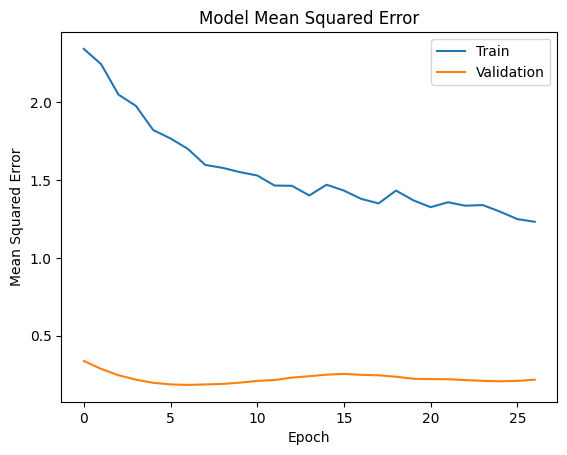

In [45]:
# Generate the data
n = 10  
df_small = allais_data(n)

# Train the model
allais_model(df_small, EPOCHS=100, BATCH_SIZE=10)

Example using a medium dataset

Epoch 1/100
28/28 [==============================] - 0s 3ms/step - loss: 0.7412 - mean_squared_error: 0.7412 - val_loss: 0.0595 - val_mean_squared_error: 0.0595
Epoch 2/100
28/28 [==============================] - 0s 1ms/step - loss: 0.5951 - mean_squared_error: 0.5951 - val_loss: 0.0312 - val_mean_squared_error: 0.0312
Epoch 3/100
28/28 [==============================] - 0s 1ms/step - loss: 0.5946 - mean_squared_error: 0.5946 - val_loss: 0.0330 - val_mean_squared_error: 0.0330
Epoch 4/100
28/28 [==============================] - 0s 1ms/step - loss: 0.5905 - mean_squared_error: 0.5905 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 5/100
28/28 [==============================] - 0s 4ms/step - loss: 0.5836 - mean_squared_error: 0.5836 - val_loss: 0.0169 - val_mean_squared_error: 0.0169
Epoch 6/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5793 - mean_squared_error: 0.5793 - val_loss: 0.0280 - val_mean_squared_error: 0.0280
Epoch 7/100
28/28 [===============

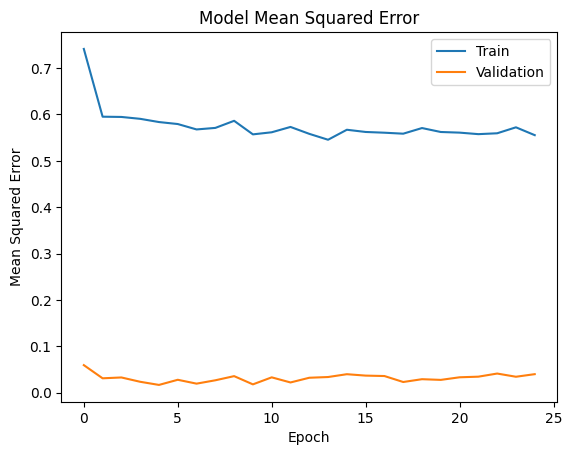

In [46]:
# Generate the data
n = 100
df_small = allais_data(n)

# Train the model
allais_model(df_small, EPOCHS=500, BATCH_SIZE=10)

### Example using a large dataset

Epoch 1/100
280/280 [==============================] - 0s 873us/step - loss: 0.9513 - mean_squared_error: 0.9513 - val_loss: 0.9345 - val_mean_squared_error: 0.9345
Epoch 2/100
280/280 [==============================] - 0s 662us/step - loss: 0.8524 - mean_squared_error: 0.8524 - val_loss: 0.9294 - val_mean_squared_error: 0.9294
Epoch 3/100
280/280 [==============================] - 0s 668us/step - loss: 0.8511 - mean_squared_error: 0.8511 - val_loss: 0.9360 - val_mean_squared_error: 0.9360
Epoch 4/100
280/280 [==============================] - 0s 789us/step - loss: 0.8523 - mean_squared_error: 0.8523 - val_loss: 0.9271 - val_mean_squared_error: 0.9271
Epoch 5/100
280/280 [==============================] - 0s 698us/step - loss: 0.8472 - mean_squared_error: 0.8472 - val_loss: 0.9353 - val_mean_squared_error: 0.9353
Epoch 6/100
280/280 [==============================] - 0s 662us/step - loss: 0.8509 - mean_squared_error: 0.8509 - val_loss: 0.9270 - val_mean_squared_error: 0.9270
Epoch 7/10

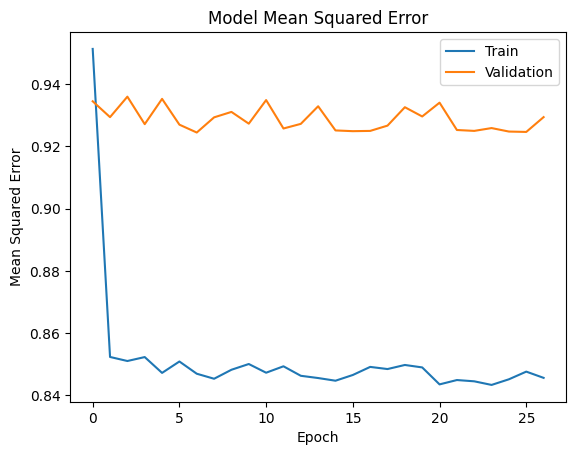

In [47]:
# Generate the data
n = 1000 
df_small = allais_data(n)

# Train the model
allais_model(df_small, EPOCHS=500, BATCH_SIZE=10)